In [1]:
import numpy as np
import pandas as pd
import datetime
import pandas_datareader 
import matplotlib.pyplot as plt
import requests
from dstapi import DstApi 
from IPython.display import display
from io import StringIO
from types import SimpleNamespace
from scipy import optimize




This project will look into the relationship between the amount of cars in Denmark and the Danish GDP



In [61]:
NAN1 = DstApi("NAN1") #Collecting data. Loading it directly from DST. 
BIL600 = DstApi("BIL600") #Collecting data. Loading it directly from DST.
tabNAN1 = NAN1.tablesummary(language='en')
tabBIL = BIL600.tablesummary(language='en')

#In order to set up the parameters for the collection of data, we need to know, which parameters, we are working with.
#Therefore, display each variable in the dataset and its different values
for variable in tabNAN1['variable name']:
    print(variable+':')
    display(NAN1.variable_levels(variable, language='en'))

for variable in tabBIL['variable name']:
    print(variable+':')
    display(BIL600.variable_levels(variable, language='en'))



Table NAN1: Demand and supply by transaction, price unit and time
Last update: 2023-03-31T08:00:00
Table BIL600: Families purchase of vehicles by region, patteren of purchase and time
Last update: 2022-06-24T08:00:00
TRANSAKT:


,id,text
0,B1GQK,B.1*g Gross domestic product
1,P7K,P.7 Imports of goods and services
2,P71K,P.71 Import of goods
3,P72K,P.72 Import of services
4,TFSPR,Supply
5,P6D,P.6 Exports of goods and services
6,P61D,P.61 Export of goods
7,P62D,P.62 Export of services
8,P31S1MD,P.31 Private consumption
9,P31S14D,P.31 Household consumption expenditure


PRISENHED:


,id,text
0,V_M,"Current prices, (bill. DKK.)"
1,LAN_M,"2010-prices, chained values, (bill. DKK.)"
2,L_V,Period-to-period real growth (per cent)
3,V_C,"Pr. capita. Current prices, (1000 DKK.)"
4,L_VB,"Contribution to GDP growth, (percentage point)"
5,LAN_C,"Pr. capita, 2010-prices, chained values, (1000..."


Tid:


,id,text
0,1966,1966
1,1967,1967
2,1968,1968
3,1969,1969
4,1970,1970
5,1971,1971
6,1972,1972
7,1973,1973
8,1974,1974
9,1975,1975


OMRÅDE:


,id,text
0,000,All Denmark
1,084,Region Hovedstaden
2,01,Province Byen København
3,101,Copenhagen
4,147,Frederiksberg
...,...,...
112,840,Rebild
113,787,Thisted
114,820,Vesthimmerlands
115,851,Aalborg


KOEBMOENS:


,id,text
0,10000,"Families, total"
1,10010,"Families, who have not purchased cars, total"
2,10020,"Families, who have purchased cars, total"
3,10030,"Families, who have purchased 1 car, total"
4,10040,"Families, who have purchased private cars"
5,10050,"Families, who have purchased vans"
6,10055,"Families, who have leased private cars"
7,10060,"Families, who have purchased 2 cars, total"
8,10070,"Families, who have purchased 2 private cars"
9,10080,"Families, who have purchased 2 vans"


Tid:


,id,text
0,2006,2006
1,2007,2007
2,2008,2008
3,2009,2009
4,2010,2010
5,2011,2011
6,2012,2012
7,2013,2013
8,2014,2014
9,2015,2015


In [3]:
paramNAN1 = NAN1._define_base_params(language='en') #We then identify the base parameters in the dataset and print it. 
paramNAN1


{'table': 'nan1',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'TRANSAKT', 'values': ['*']},
  {'code': 'PRISENHED', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [17]:
paramBIL = BIL600._define_base_params(language='en') #We do it for both datasets
paramBIL


{'table': 'bil600',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'OMRÅDE', 'values': ['*']},
  {'code': 'KOEBMOENS', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [62]:
variables = paramNAN1['variables'] # Returns a view of the variables in which we can edit
variables[1]['values'] = ['*']
variables[2]['values'] =['*']
paramNAN1

{'table': 'nan1',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'TRANSAKT', 'values': ['B1GQK']},
  {'code': 'PRISENHED', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [6]:
variables = paramBIL['variables'] # Same thing for the second dataset
variables[1]['values'] = ['*']
paramBIL

{'table': 'bil55',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'REGBIL', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [41]:
paramNAN1 = {'table': 'nan1', #For both datasets, we specify the exact amount of data we want to retrieve from STATBANK.dk. 
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'TRANSAKT', 'values': ['B1GQK']},
  {'code': 'PRISENHED', 'values': ['V_M']},
  {'code': 'Tid', 'values': ['>=2006<=2021']}]}
#The value ids are collected from the tables created above 
paramBIL =  {'table': 'bil600',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'OMRÅDE', 'values': ['000']},
  {'code': 'KOEBMOENS', 'values': ['10000']},
  {'code': 'Tid', 'values': ['>=2006<=2021']}]}

NAN = NAN1.get_data(params=paramNAN1)
BIL = BIL600.get_data(params=paramBIL)

print(BIL.head())
print(NAN.head())


        OMRÅDE        KOEBMOENS   TID  INDHOLD
0  All Denmark  Families, total  2006  2763036
1  All Denmark  Families, total  2007  2784805
2  All Denmark  Families, total  2008  2809760
3  All Denmark  Families, total  2009  2827449
4  All Denmark  Families, total  2010  2846699
                       TRANSAKT                     PRISENHED   TID INDHOLD
0  B.1*g Gross domestic product  Current prices, (bill. DKK.)  2006  1682.3
1  B.1*g Gross domestic product  Current prices, (bill. DKK.)  2007  1738.8
2  B.1*g Gross domestic product  Current prices, (bill. DKK.)  2008  1801.5
3  B.1*g Gross domestic product  Current prices, (bill. DKK.)  2009  1722.1
4  B.1*g Gross domestic product  Current prices, (bill. DKK.)  2010  1810.9


In [42]:
NAN_Sorted = NAN.sort_values('TID') #To make it cleaner, we then sort the data after year
BIL_Sorted = BIL.sort_values('TID')
NANSorted=NAN_Sorted.rename(columns={ 'TID':'YEAR', 'INDHOLD' : 'Value in Billions'}) #Furthermore, we rename columms. 
BILSorted=BIL.rename(columns={'TID':'YEAR', 'INDHOLD' : 'Number of Cars'})
Merged = pd.merge(NANSorted,BILSorted,how='inner',on=['YEAR']) #We then merge the two datasets on the basis of the year.
Final = Merged.drop(columns=['OMRÅDE', 'KOEBMOENS']) #Lastly, we drop the columms we no longer need. 
print(Final.head())


                       TRANSAKT                     PRISENHED  YEAR  \
0  B.1*g Gross domestic product  Current prices, (bill. DKK.)  2006   
1  B.1*g Gross domestic product  Current prices, (bill. DKK.)  2007   
2  B.1*g Gross domestic product  Current prices, (bill. DKK.)  2008   
3  B.1*g Gross domestic product  Current prices, (bill. DKK.)  2009   
4  B.1*g Gross domestic product  Current prices, (bill. DKK.)  2010   

  Value in Billions  Number of Cars  
0            1682.3         2763036  
1            1738.8         2784805  
2            1801.5         2809760  
3            1722.1         2827449  
4            1810.9         2846699  


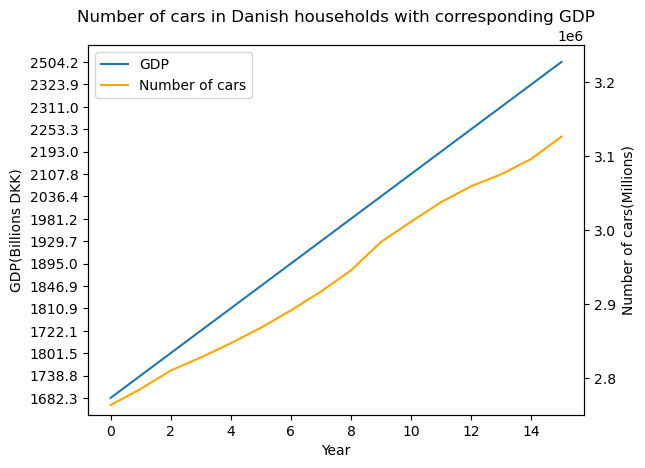

In [63]:
#We then create a plot
fig, ax1 = plt.subplots()
ax1.plot(Final['Value in Billions'], label='GDP')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP(Billions DKK)')

#Because the two merged values have different formats, we create a secondary axis in order to better show the results
ax2 = ax1.twinx()
ax2.plot(Final['Number of Cars'], color='orange', label='Number of cars')
ax2.set_ylabel('Number of cars(Millions)')

# Creating bounds for the secondary axis.
ax2.set_ylim([2750000, 3250000]) 


# Because we have created a secondary axis, we have two legends. The code below simplifies it and create a singular legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2)

#We then title it 
plt.title('Number of cars in Danish households with corresponding GDP')

#Displaying it 
plt.show()
